In [2]:
%matplotlib widget

import ipywidgets as widgets
from ipywidgets import HBox, VBox, jslink, Box, Layout
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from scipy.integrate import solve_ivp

In [3]:
def make_box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )

# Stabilitätsanalyse für Ruhelagen

## Pendel

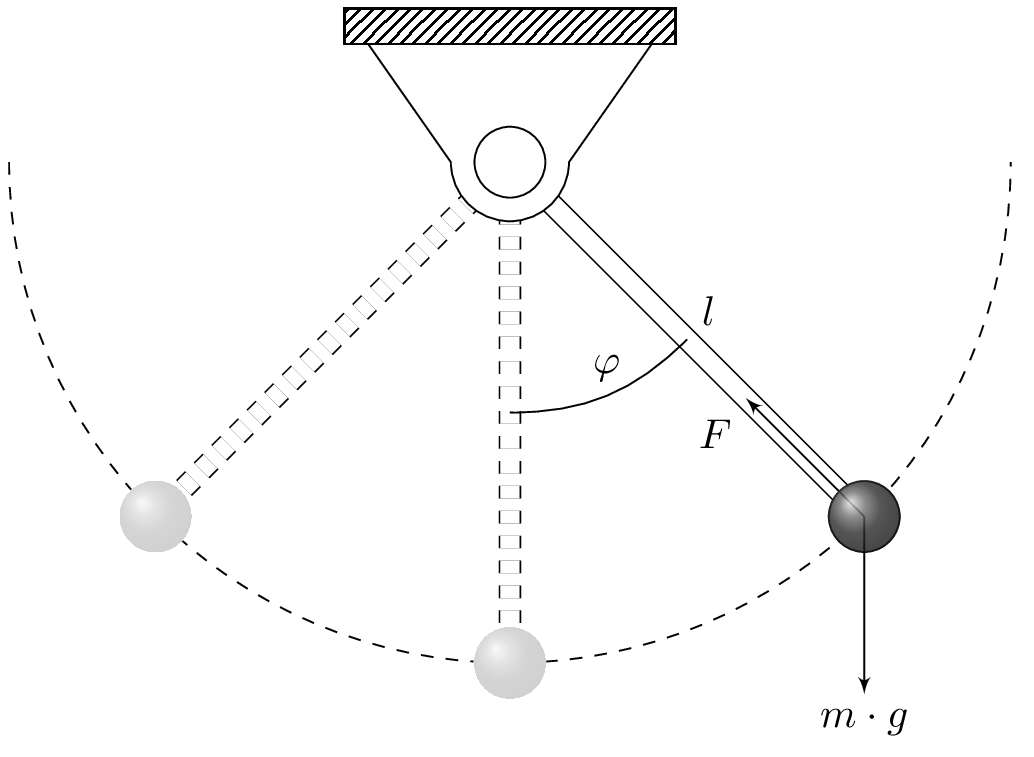

In [4]:
imag = Image("../../images/pendulum.png", width=600)
display(imag)

### Mathematische Beschreibung
- __mathematisches Pendel__ mit Dämpfung $k$ in Aufhängung
- nichtlineares Modell
  \begin{align*}
      m\, l^2\ddot{\varphi}(t) + k \dot{\varphi}(t) + m\,g\, l \sin(\varphi(t)) & = 0, & \varphi(0) & = \varphi_0, & \dot{\varphi}(0) & = \dot{\varphi}_0
  \end{align*}
- Ruhelagen nichtlineares Modell
  \begin{align*}
      \sin(\bar{\varphi}(t)) & = 0 & \bar{\varphi}_i & = i \pi, & i & = 0, 1, 2, \ldots
  \end{align*}
- linearisiertes Modell mit $\tilde{\varphi} = \varphi - \bar{\varphi}$
  \begin{align*}
      \ddot{\tilde{\varphi}}(t) + \frac{k}{m\, l^2} \dot{\tilde{\varphi}}(t) + \frac{g}{l} \varphi(t) & = 0
  \end{align*}
- Zustandsdarstellung mit $x_1 = \tilde{\varphi}$, $x_2 = \dot{\tilde{\varphi}}$
  \begin{align*}
      \begin{pmatrix}\dot{x}_1(t)\\\dot{x}_2(t) \end{pmatrix} & = \underbrace{\begin{pmatrix} 0 & 1\\ -\frac{g}{l} & -\frac{k}{m\, l^2}\end{pmatrix}}_{\boldsymbol{A}} \begin{pmatrix} x_1(t) \\  x_2(t)\end{pmatrix}, & \begin{pmatrix} x_1(0) \\  x_2(0)\end{pmatrix} & = \begin{pmatrix} x_{10} \\  x_{20}\end{pmatrix}
  \end{align*}
- Ruhelagen linearisiertes Modell aus Matrix $\boldsymbol{A}$ mit $\det(\boldsymbol{A}) = \frac{g}{l} \neq 0$


__System- und Simulationsparameter__

In [ ]:
l = 1
m = 1
g = 9.81

In [ ]:
tSim = np.linspace(0, 10, 1001)

x0 = [0, 0.]
k0 = 0

__Simulation__

In [ ]:
output = widgets.Output()

with output:
    fig = plt.figure(figsize=(10, 5))
    ax3 = plt.subplot(122)
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(223)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.subplots_adjust(bottom=0.1, top=0.93, left=0.125, right=0.9)

ax1.set_xlim([0, tSim[-1]]) 
ax1.set_ylim([-200, 650]) 
ax2.set_xlim([-2*np.pi, 2*np.pi]) 
ax2.set_ylim([-10, 10]) 
ax1.grid() 
ax2.grid()
ax3.set_xlim(-l * 1.2, l * 1.2)
ax3.set_ylim(-l * 1.2, l * 1.2)
ax3.set_xticks([])
ax3.set_yticks([])
ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"$\varphi$")
ax2.set_xlabel(r"$\varphi$")
ax2.set_ylabel(r"$\dot{\varphi}$")

lineLinSys, = ax1.plot([], [], label='linear')
lineLinTraj, = ax2.plot([], [])
lineNlSys, = ax1.plot([], [], label='nichtlinear')
lineNlTraj, = ax2.plot([], [])

lineAniLin, = ax3.plot([0, l * np.sin(x0[0])], [0, -l * np.cos(x0[0])], lw=3, c='k')
circleAniLin = ax3.add_patch(plt.Circle((l * np.sin(x0[0]), -l * np.cos(x0[0])), 0.08, fc='blue', zorder=3))
lineAniNl, = ax3.plot([0, l * np.sin(x0[0])], [0, -l * np.cos(x0[0])], lw=3, c='k', alpha=0.5)
circleAniNl = ax3.add_patch(plt.Circle((l * np.sin(x0[0]), -l * np.cos(x0[0])), 0.08, fc='orange', zorder=3))

handlesAx, labelsAx = ax1.get_legend_handles_labels()
fig.legend([handle for i, handle in enumerate(handlesAx)],
           [label for i, label in enumerate(labelsAx)],
           bbox_to_anchor=(0.13, 0.94, 0.7675, .15), loc=3,
           ncol=2, mode="expand", borderaxespad=0., framealpha=0.5)

playB = widgets.Play(value=0,
                     min=0, 
                     max=len(tSim),
                     step=10)
sliderB = widgets.IntSlider(value=0,
                            min=0,
                            max=len(tSim),
                            step=10)
sliderK = widgets.FloatSlider(value=k0,
                              min=-1,
                              max=1,
                              step=0.25,
                              description='k')
sliderX00 = widgets.FloatSlider(value=x0[0],
                                min=-np.pi,
                                max=np.pi,
                                step=np.pi / 4,
                                description='x00')
sliderX01 = widgets.FloatSlider(value=x0[1],
                                min=-1,
                                max=1,
                                step=0.1,
                                description='x01')
                                         
def updateLinOde(_):
    k = sliderK.value
    x0 = [sliderX00.value, sliderX01.value]
    global resLin
    
    def linPendel(t, x, k):
        dx = np.zeros(2)
        dx[0] = x[1]
        dx[1] = - g / l * x[0] - k / (m * l ** 2) * x[1]

        return dx
    
    resLin = solve_ivp(linPendel,
                       [tSim[0], tSim[-1]],
                       x0,
                       t_eval=tSim, args=(k, ))

def updateNlOde(_):
    k = sliderK.value
    x0 = [sliderX00.value, sliderX01.value]
    global resNl

    def nlPendel(t, x, k):
        dx = np.zeros(2)
        dx[0] = x[1]
        dx[1] = - g / l * np.sin(x[0]) - k / (m * l ** 2) * x[1]

        return dx
    
    resNl = solve_ivp(nlPendel,
                      [tSim[0], tSim[-1]],
                      x0,
                      t_eval=tSim, args=(k, ))

def updatePlot(change):
    idx = change['new']
    lineLinSys.set_data(tSim[:idx], np.rad2deg(resLin.y.T[:idx, 0]))
    lineNlSys.set_data(tSim[:idx], np.rad2deg(resNl.y.T[:idx, 0]))
    lineLinTraj.set_data(resLin.y.T[:idx, 0], resLin.y.T[:idx, 1])
    lineNlTraj.set_data(resNl.y.T[:idx, 0], resNl.y.T[:idx, 1])
    
    phiLin = resLin.y.T[idx, 0]
    xLin = l * np.sin(phiLin)
    yLin = -l * np.cos(phiLin)
    lineAniLin.set_data([0, xLin], [0, yLin])
    circleAniLin.set_center((xLin, yLin))

    phiNl = resNl.y.T[idx, 0]
    xNl = l * np.sin(phiNl)
    yNl = -l * np.cos(phiNl)
    lineAniNl.set_data([0, xNl], [0, yNl])
    circleAniNl.set_center((xNl, yNl))

    fig.canvas.draw()    

sliderB.observe(updatePlot, names='value')
sliderK.observe(updateNlOde, names='value')
sliderK.observe(updateLinOde, names='value')
sliderX00.observe(updateNlOde)
sliderX00.observe(updateLinOde)
sliderX01.observe(updateNlOde)
sliderX01.observe(updateLinOde)

updateNlOde(_)
updateLinOde(_)

odeControls = VBox([sliderK, sliderX00, sliderX01])
odeControls.layout = make_box_layout()
jslink((playB, 'value'), (sliderB, 'value'))
videoControls = VBox([HBox([playB, sliderB]), output])
videoControls.layout = make_box_layout()

HBox([odeControls, Box([videoControls])], layout=Layout(display='flex', flex_flow='row', justify_content='center', align_items='center'))